## Observations and Insights  

1. Based on the analysis, Capomulin was the most successful at keeping the most mice alive throughout the study with 21; HOWEVER,
2. Ramicane had the best quartile spread represting a better reduction in final Tumor Volume (mm3) AND was also succesful in keeping mice alive: EXCELLENT NEWS FOR INVESTORS!
3. Unsurprsingly, there was a positive correlation between average mouse weight and tumor volume (mm3), meaning mice with bigger tumors weighed more (probably due to their volumous tumors).

I would recommend increasing sample sizes before going to the next stage in Pymaceuticals Inc cancer studies, it would be unethical to harm any higher mammalian 
life forms (monkeys deserve better), however results appear promising. 

I just want to clarify a couple sections of my Pymaceuticals Homework:
    
1. In the Bar Charts section, I Took "throughout the course of the study" to mean the total number of mice alive by the end of timepoint 45 (the last time point) per Drug Regimen. When I asked for assistance I could not get a consensus between my tutor & AskBCS on the question just an idea of what the chart should look like. So I have chosen to define it as such and plotted accordingly.
2. I had a very difficult time with the Boxplots section so I did the background work in multiple steps/ multiple ways to gain greater perspective/ experience, the 1st way is the long way, but after that, I generated the loop you are probably looking for. I also created multiple actual boxplots as part of my exercise(s), I did not have the heart to delete it all b/c I feel keeping it is good for my own personal edification.
3. I did an extra line plot for Ramicane in order to get data to support my 2nd observation, once I got the hang of these, I was on a roll... but man, it built a lot of character.
    

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
pd.options.mode.chained_assignment = None 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combo_d = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combo_d

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
num_mice = len(combo_d["Mouse ID"].unique())
num_mice_df = pd.DataFrame({"Total Number of Mice":[num_mice]})
num_mice_df

,Total Number of Mice
0,249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grpd_combod = combo_d.groupby(['Mouse ID', 'Timepoint'])
grpd_combod.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
# Removing duplicates
duplicate_ids = combo_d.loc[combo_d.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicates = combo_d.loc[combo_d['Mouse ID'] == "g989"]
clnr_combo_d = combo_d[combo_d["Mouse ID"].isin(duplicate_ids) == False]
clnr_combo_d

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clnr_combo_d = combo_d[combo_d["Mouse ID"].isin(duplicate_ids) == False]
clnr_combo_d

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
num_cmice = len(clnr_combo_d["Mouse ID"].unique())
num_cmice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_reg = clnr_combo_d["Drug Regimen"].unique()
drug_reg

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [11]:
ramicane = clnr_combo_d.loc[clnr_combo_d["Drug Regimen"] == "Ramicane", :]
rami_mean = ramicane["Tumor Volume (mm3)"].mean()
rami_median = ramicane["Tumor Volume (mm3)"].median()
rami_var = ramicane["Tumor Volume (mm3)"].var()
rami_std = ramicane["Tumor Volume (mm3)"].std()
rami_sem = ramicane["Tumor Volume (mm3)"].sem()

capomulin = clnr_combo_d.loc[clnr_combo_d["Drug Regimen"] == "Capomulin", :]
capo_mean = capomulin["Tumor Volume (mm3)"].mean()
capo_median = capomulin["Tumor Volume (mm3)"].median()
capo_var = capomulin["Tumor Volume (mm3)"].var()
capo_std = capomulin["Tumor Volume (mm3)"].std()
capo_sem = capomulin["Tumor Volume (mm3)"].sem()

infubinol = clnr_combo_d.loc[clnr_combo_d["Drug Regimen"] == "Infubinol", :]
infu_mean = infubinol["Tumor Volume (mm3)"].mean()
infu_median = infubinol["Tumor Volume (mm3)"].median()
infu_var = infubinol["Tumor Volume (mm3)"].var()
infu_std = infubinol["Tumor Volume (mm3)"].std()
infu_sem = infubinol["Tumor Volume (mm3)"].sem()

placebo = clnr_combo_d.loc[clnr_combo_d["Drug Regimen"] == "Placebo", :]
place_mean = placebo["Tumor Volume (mm3)"].mean()
place_median = placebo["Tumor Volume (mm3)"].median()
place_var = placebo["Tumor Volume (mm3)"].var()
place_std = placebo["Tumor Volume (mm3)"].std()
place_sem = placebo["Tumor Volume (mm3)"].sem()

ceftamin = clnr_combo_d.loc[clnr_combo_d["Drug Regimen"] == "Ceftamin", :]
ceft_mean = ceftamin["Tumor Volume (mm3)"].mean()
ceft_median = ceftamin["Tumor Volume (mm3)"].median()
ceft_var = ceftamin["Tumor Volume (mm3)"].var()
ceft_std = ceftamin["Tumor Volume (mm3)"].std()
ceft_sem = ceftamin["Tumor Volume (mm3)"].sem()

stelasyn = clnr_combo_d.loc[clnr_combo_d["Drug Regimen"] == "Stelasyn", :]
stela_mean = stelasyn["Tumor Volume (mm3)"].mean()
stela_median = stelasyn["Tumor Volume (mm3)"].median()
stela_var = stelasyn["Tumor Volume (mm3)"].var()
stela_std = stelasyn["Tumor Volume (mm3)"].std()
stela_sem = stelasyn["Tumor Volume (mm3)"].sem()

zoniferol = clnr_combo_d.loc[clnr_combo_d["Drug Regimen"] == "Zoniferol", :]
zoni_mean = zoniferol["Tumor Volume (mm3)"].mean()
zoni_median = zoniferol["Tumor Volume (mm3)"].median()
zoni_var = zoniferol["Tumor Volume (mm3)"].var()
zoni_std = zoniferol["Tumor Volume (mm3)"].std()
zoni_sem = zoniferol["Tumor Volume (mm3)"].sem()

ketapril = clnr_combo_d.loc[clnr_combo_d["Drug Regimen"] == "Ketapril", :]
keta_mean = ketapril["Tumor Volume (mm3)"].mean()
keta_median = ketapril["Tumor Volume (mm3)"].median()
keta_var = ketapril["Tumor Volume (mm3)"].var()
keta_std = ketapril["Tumor Volume (mm3)"].std()
keta_sem = ketapril["Tumor Volume (mm3)"].sem()

propriva = clnr_combo_d.loc[clnr_combo_d["Drug Regimen"] == "Propriva", :]
prop_mean = propriva["Tumor Volume (mm3)"].mean()
prop_median = propriva["Tumor Volume (mm3)"].median()
prop_var = propriva["Tumor Volume (mm3)"].var()
prop_std = propriva["Tumor Volume (mm3)"].std()
prop_sem = propriva["Tumor Volume (mm3)"].sem()

naftisol = clnr_combo_d.loc[clnr_combo_d["Drug Regimen"] == "Naftisol", :]
naft_mean = naftisol["Tumor Volume (mm3)"].mean()
naft_median = naftisol["Tumor Volume (mm3)"].median()
naft_var = naftisol["Tumor Volume (mm3)"].var()
naft_std = naftisol["Tumor Volume (mm3)"].std()
naft_sem = naftisol["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Drug Regimen":['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
        "Average Tumor Volume (mm3)":[rami_mean, capo_mean, infu_mean, place_mean, ceft_mean, stela_mean, zoni_mean, keta_mean, prop_mean, naft_mean],
     "Median Tumor Volume (mm3)": [rami_median, capo_median, infu_median, place_median, ceft_median, stela_median, zoni_median, keta_median, prop_median, naft_median],
    "Variance in Tumor Volume (mm3)": [rami_var, capo_var, infu_var, place_var, ceft_var, stela_var, zoni_var, keta_var, prop_var, naft_var], 
     "Standard Deviation in Tumor Volume (mm3)": [rami_std, capo_std, infu_std, place_std, ceft_std, stela_std, zoni_std, keta_std, prop_std, naft_std],
     "Standard Error in Tumor Volume (mm3)": [rami_sem, capo_sem, infu_sem, place_sem, ceft_sem, stela_sem, zoni_sem, keta_sem, prop_sem, naft_sem]})
summary_stats.set_index('Drug Regimen', inplace=True)
summary_stats = summary_stats.sort_values("Drug Regimen")
summary_stats["Average Tumor Volume (mm3)"] = summary_stats["Average Tumor Volume (mm3)"].map("{:.3f}".format)
summary_stats["Median Tumor Volume (mm3)"] = summary_stats["Median Tumor Volume (mm3)"].map("{:.3f}".format)
summary_stats["Variance in Tumor Volume (mm3)"] = summary_stats["Variance in Tumor Volume (mm3)"].map("{:.3f}".format)
summary_stats["Standard Deviation in Tumor Volume (mm3)"] = summary_stats["Standard Deviation in Tumor Volume (mm3)"].map("{:.3f}".format)
summary_stats["Standard Error in Tumor Volume (mm3)"] = summary_stats["Standard Error in Tumor Volume (mm3)"].map("{:.3f}".format)
summary_stats

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance in Tumor Volume (mm3),Standard Deviation in Tumor Volume (mm3),Standard Error in Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
combod_mean = clnr_combo_d.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
combod_median = clnr_combo_d.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
combod_var = clnr_combo_d.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
combod_std = clnr_combo_d.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
combod_sem = clnr_combo_d.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sum_stats = pd.DataFrame({"Average Tumor Volume (mm3)": combod_mean, "Median Tumor Volume (mm3)": combod_median,
                                        "Variance in Tumor Volume (mm3)": combod_var, 
                                        "Standard Deviation in Tumor Volume (mm3)": combod_std,
                                        "Standard Error in Tumor Volume (mm3)": combod_sem})
sum_stats = sum_stats.sort_index()
sum_stats["Average Tumor Volume (mm3)"] = sum_stats["Average Tumor Volume (mm3)"].map("{:.3f}".format)
sum_stats["Median Tumor Volume (mm3)"] = sum_stats["Median Tumor Volume (mm3)"].map("{:.3f}".format)
sum_stats["Variance in Tumor Volume (mm3)"] = sum_stats["Variance in Tumor Volume (mm3)"].map("{:.3f}".format)
sum_stats["Standard Deviation in Tumor Volume (mm3)"] = sum_stats["Standard Deviation in Tumor Volume (mm3)"].map("{:.3f}".format)
sum_stats["Standard Error in Tumor Volume (mm3)"] = sum_stats["Standard Error in Tumor Volume (mm3)"].map("{:.3f}".format)
sum_stats


,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance in Tumor Volume (mm3),Standard Deviation in Tumor Volume (mm3),Standard Error in Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts 

In [13]:
# # Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# I Took "throughout the course of the study" to mean total number of mice alive by the end of timepoint 45 (the last time point) per Drug Regimen
mice = clnr_combo_d.groupby('Mouse ID').max()
m45 = mice.loc[mice["Timepoint"] == 45, :]
m45.set_index('Drug Regimen', inplace = True, append = True)
m45.reset_index(level = 0, inplace = True, col_level = 1) 
mcount = m45.groupby('Drug Regimen').count()["Mouse ID"]
mcount

Drug Regimen
Capomulin    21
Ceftamin     13
Infubinol     9
Ketapril     11
Naftisol     13
Placebo      11
Propriva      7
Ramicane     20
Stelasyn     11
Zoniferol    14
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


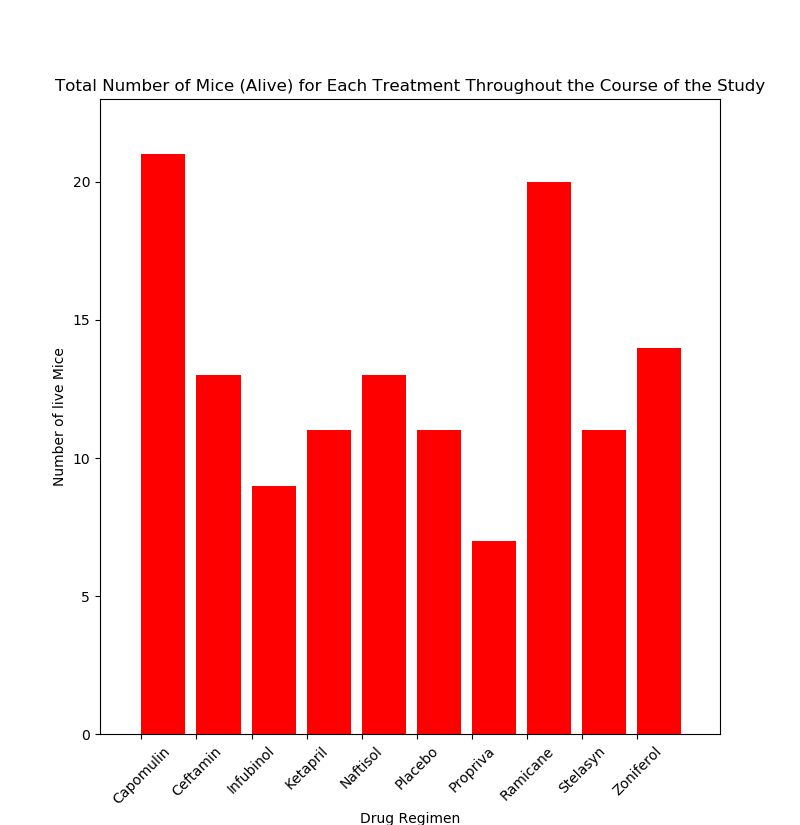

In [14]:
#mouse_count = cln_combod.groupby("Drug Regimen").count()['Mouse ID']
drug_regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
mcounts = [21,13,9,11,13,11,7,20,11,14]
x_axis = np.arange(len(drug_regimens))
plt.figure(figsize=(8,8.25))
plt.bar(x_axis, mcounts, color="r", align="edge")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens,rotation=45)
plt.title("Total Number of Mice (Alive) for Each Treatment Throughout the Course of the Study")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of live Mice")
plt.xlim(-.75, len(x_axis)+.5)
plt.ylim(0, max(mcounts)+2)
plt.show()

<IPython.core.display.Javascript object>


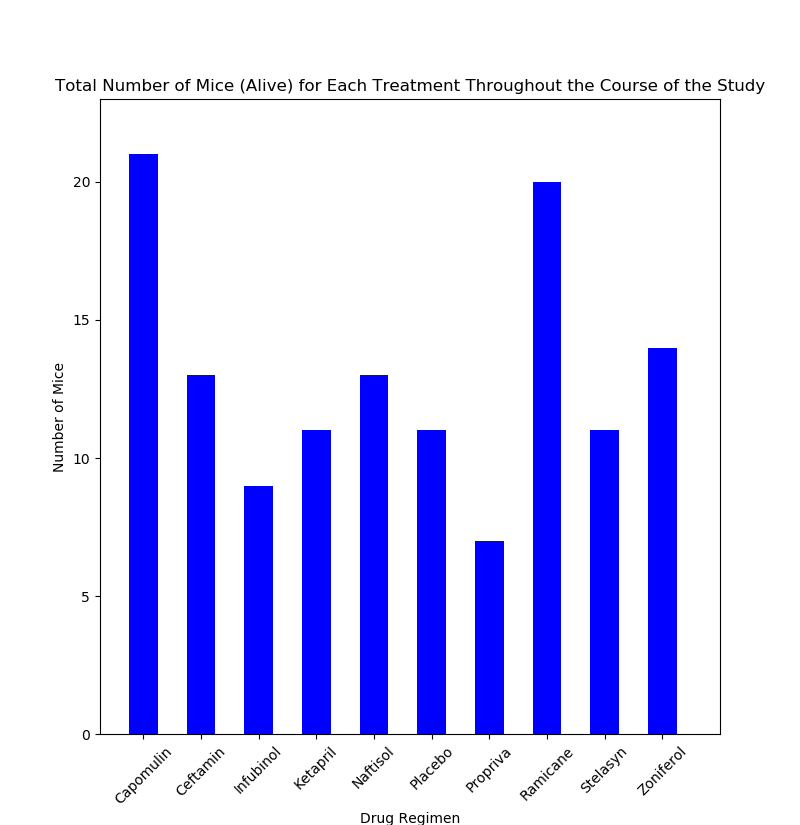

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# I Took "throughout the course of the study" to mean total number of mice alive by the end of timepoint 45 (the last time point) per Drug Regimen
mice = clnr_combo_d.groupby('Mouse ID').max()
m45 = mice.loc[mice["Timepoint"] == 45, :]
m45.set_index('Drug Regimen', inplace = True, append = True)
m45.reset_index(level = 0, inplace = True, col_level = 1) 
mcount = m45.groupby('Drug Regimen').count()["Mouse ID"]
plt.figure(figsize=(8,8.25))
mcount.plot(kind="bar", facecolor="blue")
plt.title("Total Number of Mice (Alive) for Each Treatment Throughout the Course of the Study")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlim(-.75, len(x_axis))
plt.ylim(0, max(mcounts)+2)
plt.xticks(tick_locations, drug_regimens,rotation=45)
plt.show()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = clnr_combo_d.groupby("Sex").nunique()
sex

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,,
Female,123,10,1,24,14,10,800,5
Male,125,10,1,24,14,10,834,5


<IPython.core.display.Javascript object>


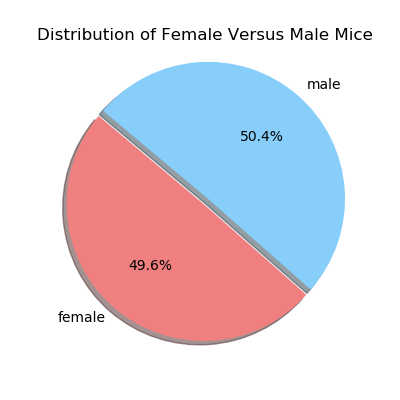

In [17]:
sex = ["female", "male"]
s_nums = [123, 125]
colors = ["lightcoral", "lightskyblue"]
explode = (0.05, 0)
plt.figure(figsize=(4,4))
plt.title("Distribution of Female Versus Male Mice")
plt.pie(s_nums, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

<IPython.core.display.Javascript object>


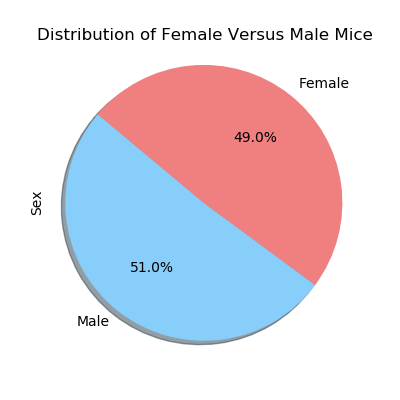

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pysex = clnr_combo_d.Sex.value_counts()
gender_list = pysex.index.values
colors = ["lightskyblue","lightcoral"]
plt.figure(figsize=(4,4))
pysex.plot(kind="pie", y=gender_list, title ="Distribution of Female Versus Male Mice",colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tum = clnr_combo_d.groupby('Mouse ID').max()["Timepoint"]
max_tum = max_tum.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tum_df = max_tum.merge(clnr_combo_d, on=["Mouse ID", "Timepoint"], how="left")
max_tum_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tum_vdata = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   # Locate the rows which contain mice on each drug and get the tumor volumes
   # add subset 
   # Determine outliers using upper and lower bounds
ca_tumv = max_tum_df.loc[max_tum_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
tum_vdata.append(ca_tumv)
quartiles = ca_tumv.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin Values below {lower_bound} could be outliers.")
print(f"Capomulin Values above {upper_bound} could be outliers.")

ra_tumv = max_tum_df.loc[max_tum_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
tum_vdata.append(ra_tumv)
quartiles = ra_tumv.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane Values below {lower_bound} could be outliers.")
print(f"Ramicane Values above {upper_bound} could be outliers.")

in_tumv = max_tum_df.loc[max_tum_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
tum_vdata.append(in_tumv)
quartiles = in_tumv.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol Values below {lower_bound} could be outliers.")
print(f"Infubinol Values above {upper_bound} could be outliers.")

ce_tumv = max_tum_df.loc[max_tum_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
tum_vdata.append(ce_tumv)
quartiles = ce_tumv.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin Values below {lower_bound} could be outliers.")
print(f"Ceftamin Values above {upper_bound} could be outliers.")

Capomulin Values below 20.70456164999999 could be outliers.
Capomulin Values above 51.83201549 could be outliers.
Ramicane Values below 17.912664470000003 could be outliers.
Ramicane Values above 54.30681135 could be outliers.
Infubinol Values below 36.83290494999999 could be outliers.
Infubinol Values above 82.74144559000001 could be outliers.
Ceftamin Values below 25.355449580000002 could be outliers.
Ceftamin Values above 87.66645829999999 could be outliers.


<IPython.core.display.Javascript object>


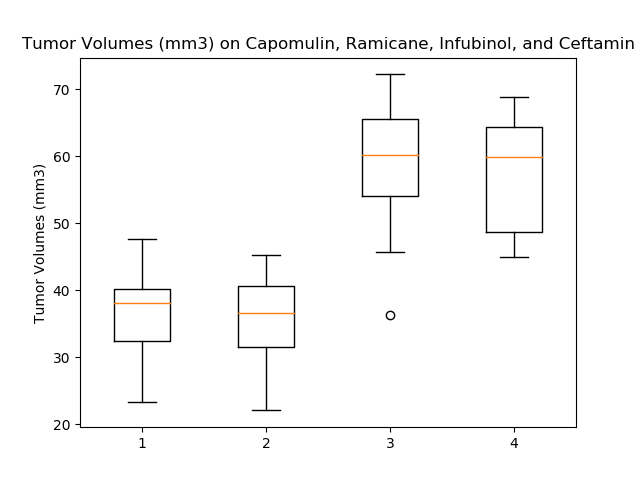

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes (mm3) on Capomulin, Ramicane, Infubinol, and Ceftamin')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(tum_vdata)
plt.show()

In [22]:
tum_vdata2 =[]
for drug in drug_reg:
    drug_tumv = max_tum_df.loc[max_tum_df["Drug Regimen"] == drug]['Tumor Volume (mm3)']
    tum_vdata2.append(drug_tumv)
    quartiles = drug_tumv.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug} Values below {lower_bound} could be outliers.")
    print(f"{drug} Values above {upper_bound} could be outliers.")

Capomulin Values below 20.70456164999999 could be outliers.
Capomulin Values above 51.83201549 could be outliers.
Ramicane Values below 17.912664470000003 could be outliers.
Ramicane Values above 54.30681135 could be outliers.
Infubinol Values below 36.83290494999999 could be outliers.
Infubinol Values above 82.74144559000001 could be outliers.
Ceftamin Values below 25.355449580000002 could be outliers.
Ceftamin Values above 87.66645829999999 could be outliers.


<IPython.core.display.Javascript object>


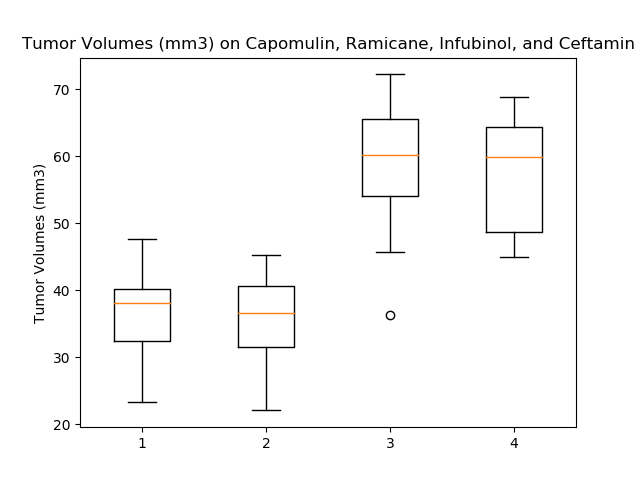

In [23]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes (mm3) on Capomulin, Ramicane, Infubinol, and Ceftamin')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(tum_vdata2)
plt.show()

<IPython.core.display.Javascript object>


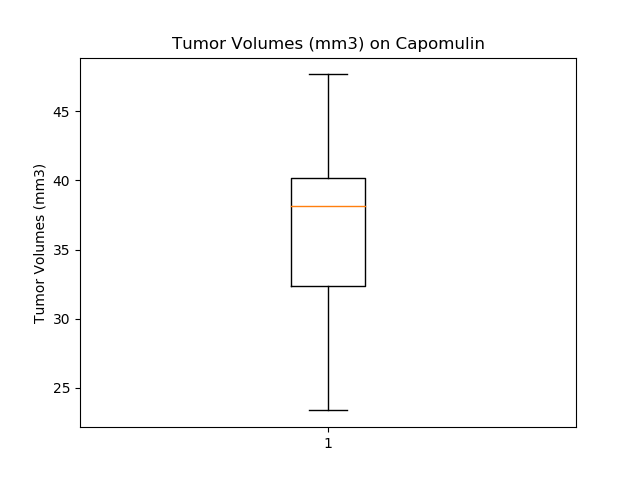

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes (mm3) on Capomulin')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(ca_tumv)
plt.show()

<IPython.core.display.Javascript object>


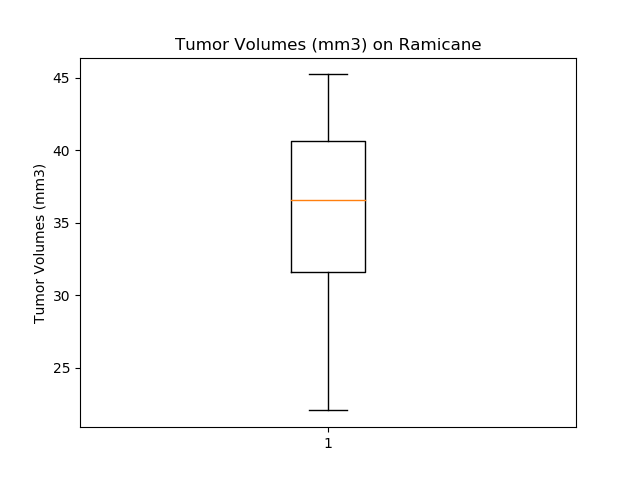

In [25]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes (mm3) on Ramicane')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(ra_tumv)
plt.show()

<IPython.core.display.Javascript object>


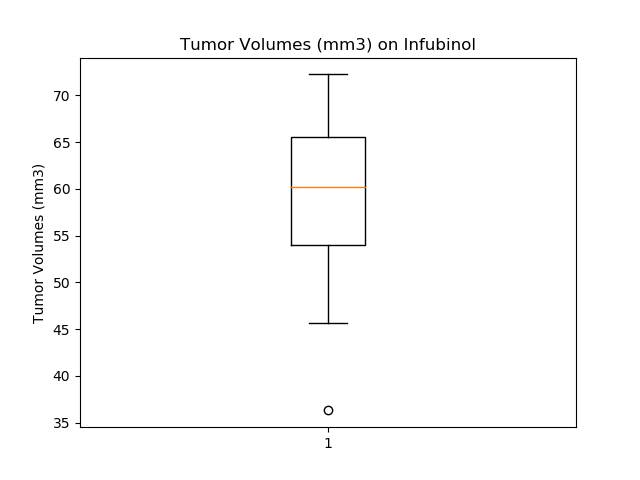

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes (mm3) on Infubinol')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(in_tumv)
plt.show()

<IPython.core.display.Javascript object>


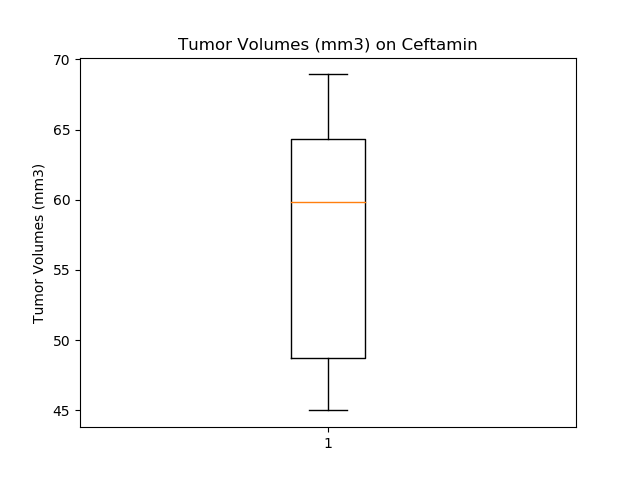

In [27]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes (mm3) on Ceftamin')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(ce_tumv)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


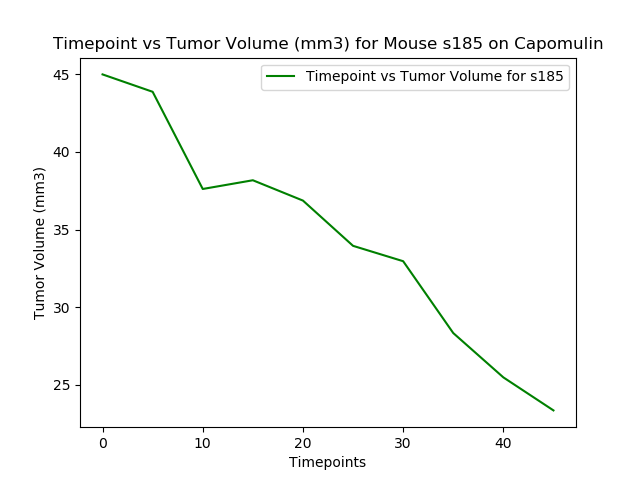

In [28]:
# Generate a line plot of timepoint versus tumor volume for a mouse treated with Capomulin
tim_s185 = clnr_combo_d.loc[clnr_combo_d["Mouse ID"] == "s185"]["Timepoint"]
tum_v185 = clnr_combo_d.loc[clnr_combo_d["Mouse ID"] == "s185"]["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
tim_v_tum = plt.plot(tim_s185, tum_v185, color="green", label="Timepoint vs Tumor Volume for s185" )
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3) for Mouse s185 on Capomulin")
plt.legend(handles=tim_v_tum, loc="best")
plt.show()

<IPython.core.display.Javascript object>


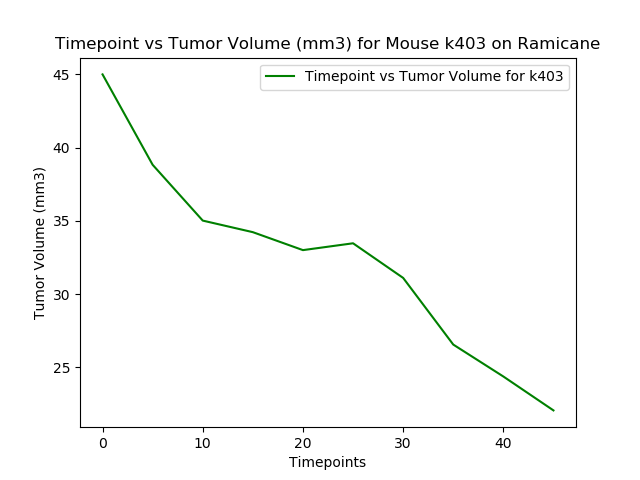

In [29]:
tim_k403 = clnr_combo_d.loc[clnr_combo_d["Mouse ID"] == "k403"]["Timepoint"]
tum_v403 = clnr_combo_d.loc[clnr_combo_d["Mouse ID"] == "k403"]["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
tim_v_tum = plt.plot(tim_k403, tum_v403, color="green", label="Timepoint vs Tumor Volume for k403" )
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3) for Mouse k403 on Ramicane")
plt.legend(handles=tim_v_tum, loc="best")
plt.show()

<IPython.core.display.Javascript object>


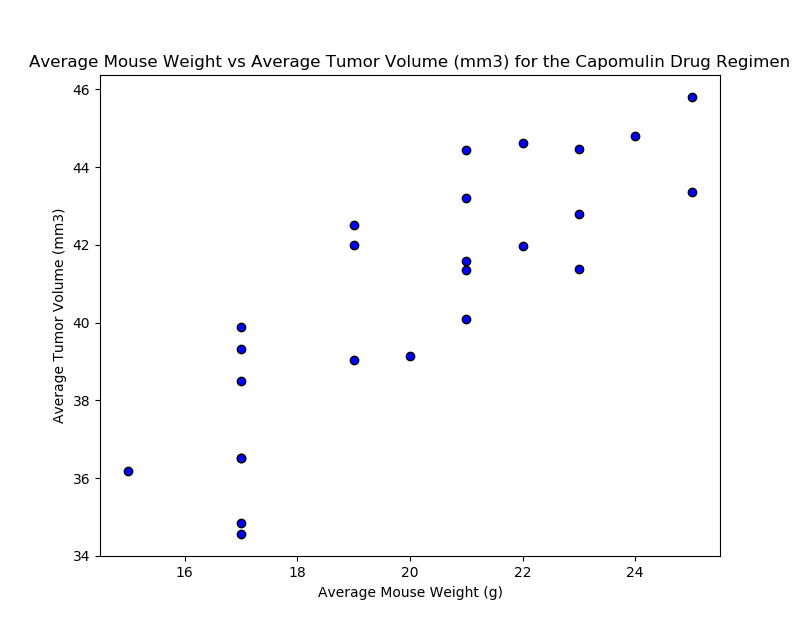

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mca_avgw = clnr_combo_d.groupby(['Mouse ID', 'Drug Regimen']).mean()["Weight (g)"]
mca_avgw = mca_avgw.reset_index()
mca_weight = mca_avgw.loc[mca_avgw["Drug Regimen"] == "Capomulin"]["Weight (g)"]

mca_avgtv = clnr_combo_d.groupby(['Mouse ID', 'Drug Regimen']).mean()["Tumor Volume (mm3)"]
mca_avgtv = mca_avgtv.reset_index()
mca_tumv = mca_avgtv.loc[mca_avgtv["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]

plt.figure(figsize=(8,6.25))
plt.scatter(mca_weight, mca_tumv, marker="o", facecolors="blue", edgecolors="black")
plt.title("Average Mouse Weight vs Average Tumor Volume (mm3) for the Capomulin Drug Regimen")
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

<IPython.core.display.Javascript object>


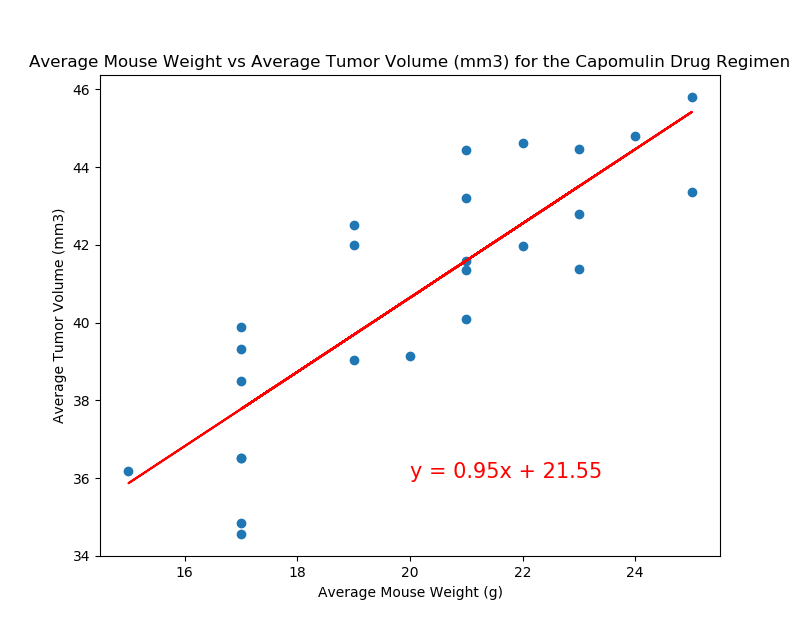

The correlation between both factors is 0.84


In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mca_avgw = clnr_combo_d.groupby(['Mouse ID', 'Drug Regimen']).mean()["Weight (g)"]
mca_avgw = mca_avgw.reset_index()
mca_weight = mca_avgw.loc[mca_avgw["Drug Regimen"] == "Capomulin"]["Weight (g)"]

mca_avgtv = clnr_combo_d.groupby(['Mouse ID', 'Drug Regimen']).mean()["Tumor Volume (mm3)"]
mca_avgtv = mca_avgtv.reset_index()
mca_tumv = mca_avgtv.loc[mca_avgtv["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(mca_weight, mca_tumv)
regress_values = mca_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(mca_weight,mca_tumv)
plt.plot(mca_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Average Mouse Weight vs Average Tumor Volume (mm3) for the Capomulin Drug Regimen")
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

correlation = st.pearsonr(mca_weight,mca_tumv)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()